# Example overview

This examples walks over the basics of the usage of this package. This can be run directly from google colab or locally by cloning the repository.

# Install package

In [ ]:
# Experimental data is stored with Git LFS, this is disabled to not pull this when installing
!git lfs install --skip-smudge

Git LFS initialized.


In [ ]:
!pip install git+https://github.com/grudloff/fbg_S-WDM.git

  Cloning https://github.com/grudloff/fbg_S-WDM.git to /tmp/pip-req-build-vkz6rj25
  Running command git clone --filter=blob:none --quiet https://github.com/grudloff/fbg_S-WDM.git /tmp/pip-req-build-vkz6rj25
  Resolved https://github.com/grudloff/fbg_S-WDM.git to commit 61a28c376c9e58cf6a49a8171cc5f0801cedd88f
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/grudloff/lssvr to /tmp/pip-install-2a_orocn/lssvr_617ec3a5e5ac483eabd7ab3e6c7bb51d
  Running command git clone --filter=blob:none --quiet https://github.com/grudloff/lssvr /tmp/pip-install-2a_orocn/lssvr_617ec3a5e5ac483eabd7ab3e6c7bb51d
  Resolved https://github.com/grudloff/lssvr to commit ad3ffcb372229ced2125249885dc670bcb0f0a91
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 38.5 MB/s eta 0:00

# Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from fbg_swdm import (
    visualization as vis,
    simulation as sim,
    variables as config,
    evolutionary as ev,
    regresors as reg,
    deep_regresors as models
)

from fbg_swdm.variables import constant

plt.rcParams['figure.figsize'] = config.figsize
plt.rcParams['figure.dpi'] = 100

config.set_base_dir("figures")

/usr/local/lib/python3.10/dist-packages/fbg_swdm/variables.py:52: UserWarning: Current folder was defined as base directory. Create
                    a 'default_base_dir.txt' file containing desired default
                    or call set_base_dir
  warnings.warn("""Current folder was defined as base directory. Create


# Simulation

## Configuration

The `variables.py` contents are dynamically modified from memory and referenced by other imported `fbg_swdm` packages. This allows for changing all aspects of the simulation and take this into account by each of the modules accordingly.

In [ ]:
Q = 2
config.setattrs(
    exp_name = 'initial_exploration',
    Q = Q,
    Δ = 1*constant.n,
    λ0 = 1550*constant.n,
    A = np.array([1]*Q),
    Δλ = np.array([0.134*constant.n, 0.203*constant.n]),
    I = np.array([0.583863107, 0.929118306]),
    N = 2000,
    topology = 'serial',
    simulation = 'gaussian'
)

In [ ]:
vars(config)

{'__name__': 'fbg_swdm.variables',
 '__doc__': None,
 '__package__': 'fbg_swdm',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7b8c1ab72020>,
 '__spec__': ModuleSpec(name='fbg_swdm.variables', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7b8c1ab72020>, origin='/usr/local/lib/python3.10/dist-packages/fbg_swdm/variables.py'),
 '__file__': '/usr/local/lib/python3.10/dist-packages/fbg_swdm/variables.py',
 '__cached__': '/usr/local/lib/python3.10/dist-packages/fbg_swdm/__pycache__/variables.cpython-310.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __imp

## Data

The `simulation` module contains the necessary logic for simulation of multiple sensors, in different topologies and settings according to `config`. This simulation will be used internally by other modules, for instance the `visualization` module.

The main entry point for this module, is the generation of a simulation dataset through the `gen_data` function. As demostrated below. The data is already splitted between training and testing in order to evade any spill over.

In [ ]:
data = sim.gen_data()
X_train, y_train, X_test, y_test = data

## Visualization

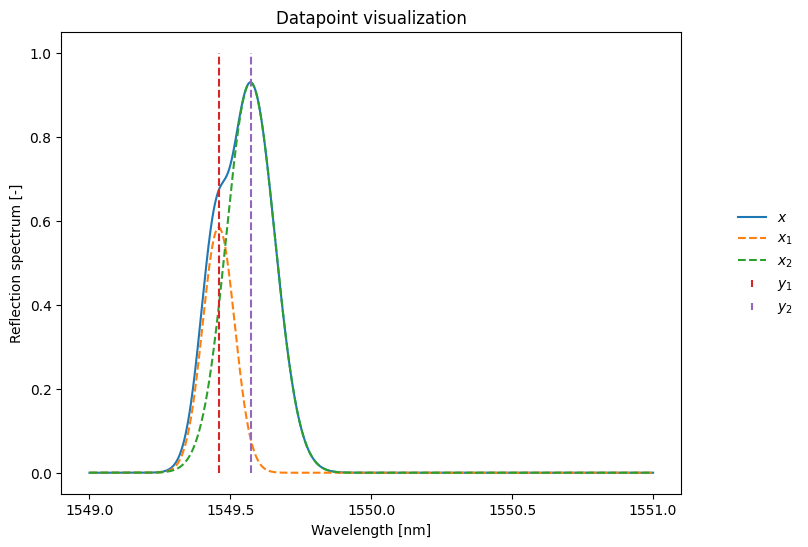

In [ ]:
vis.plot_datapoint(X_test, y_test, i=500)

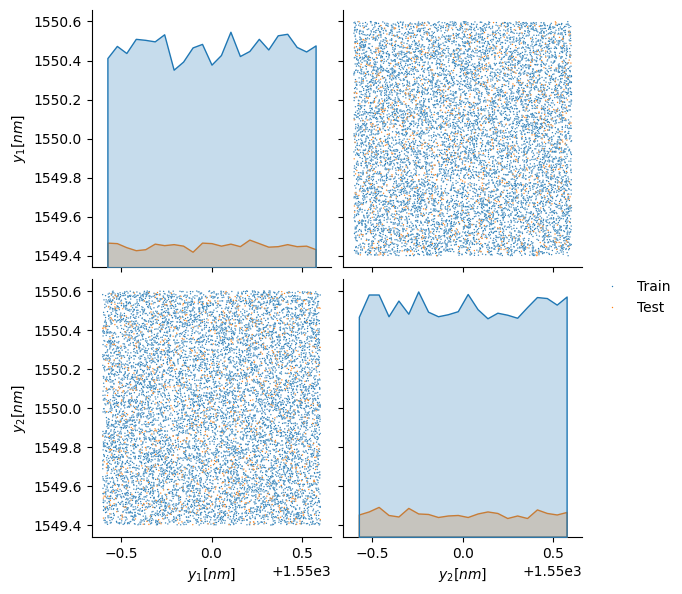

In [ ]:
vis.plot(*data)

# Example training and inference

### Regressor example

In [ ]:
config.setattrs(tag = 'elm')

In [ ]:
X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized = sim.normalize(*data)

In [ ]:
%%time
model = reg.ELM(hidden_size=16000)
model.fit(X_train_normalized, y_train_normalized)

CPU times: user 21min 25s, sys: 1min 19s, total: 22min 45s
Wall time: 14min 40s


ELM(hidden_size=16000)

In [ ]:
%%time
AE = config.Δ*np.abs(y_test_normalized-model.predict(X_test_normalized))

CPU times: user 4.14 s, sys: 430 ms, total: 4.57 s
Wall time: 3.55 s


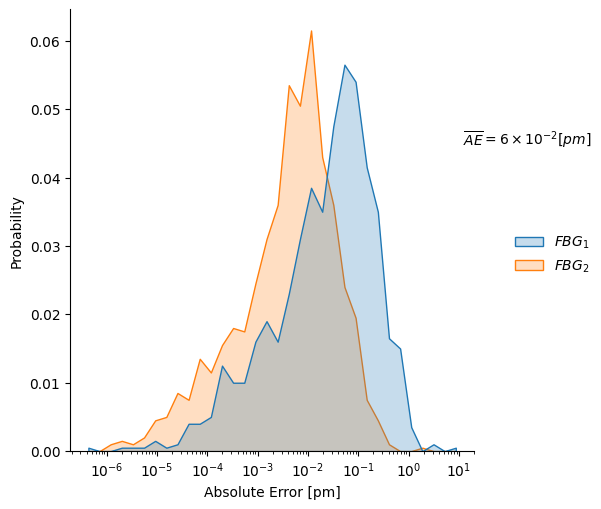

In [ ]:
vis.plot_dist(AE/config.constant.p, mean=True)

Figure saved at: figures/initial_exploration/initial_exploration_elm_sweep.pdf


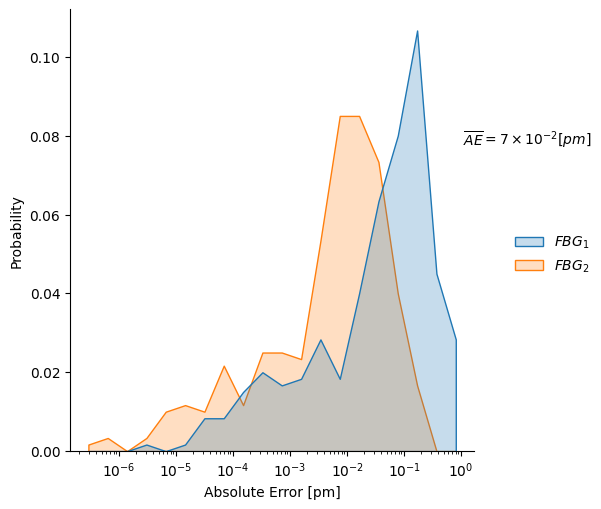

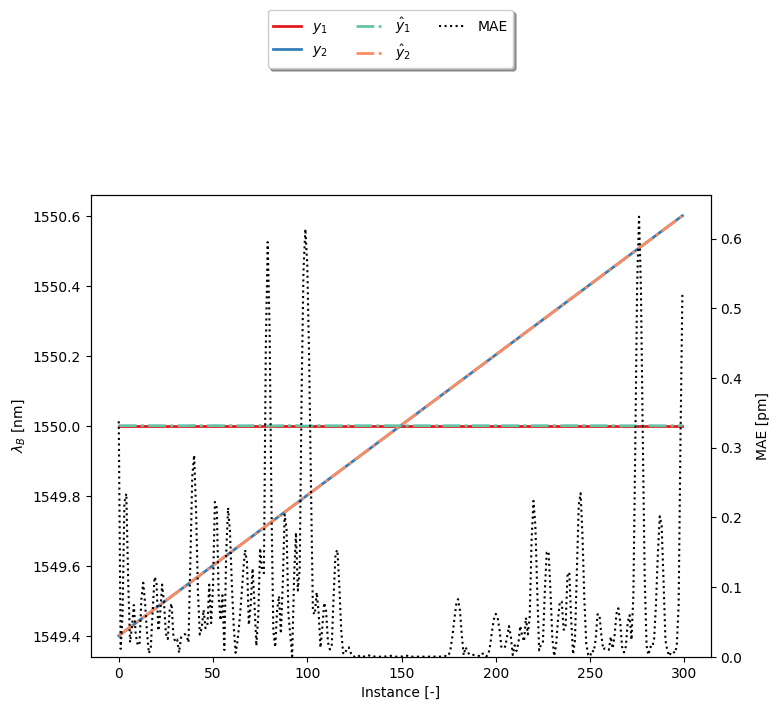

In [ ]:
vis.plot_sweep(model)

### Evolutionary algorithm example

In [ ]:
config.setattrs(tag = 'SWE')

In [ ]:
model = ev.swap_differential_evolution()

In [ ]:
%%time
AE = y_test-model.predict(X_test)

CPU times: user 27min 6s, sys: 6.22 s, total: 27min 12s
Wall time: 28min 2s


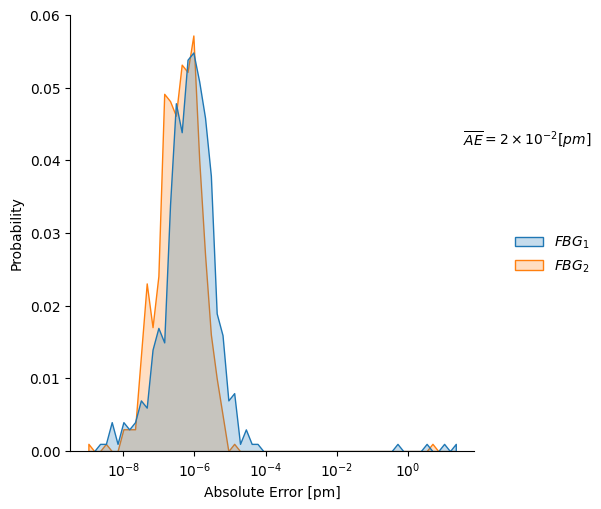

In [ ]:
vis.plot_dist(AE/config.constant.p, mean=True)

Figure saved at: figures/initial_exploration/initial_exploration_SWE_sweep.pdf


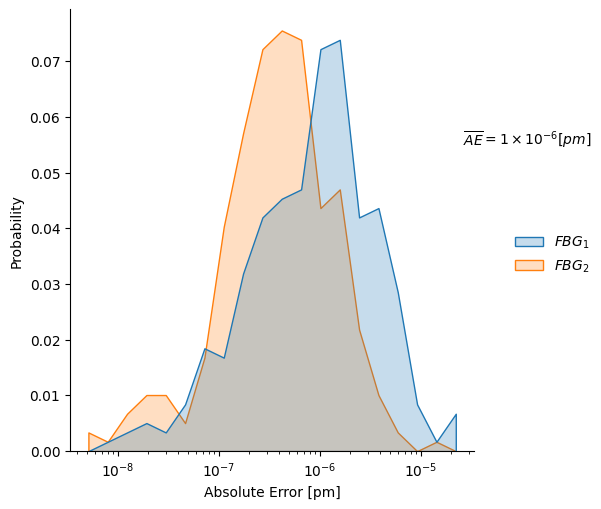

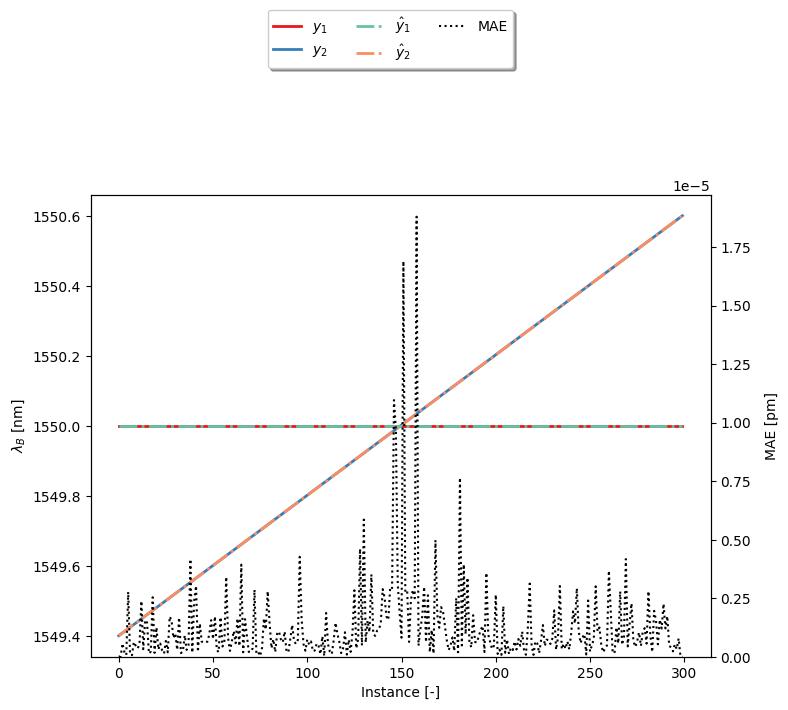

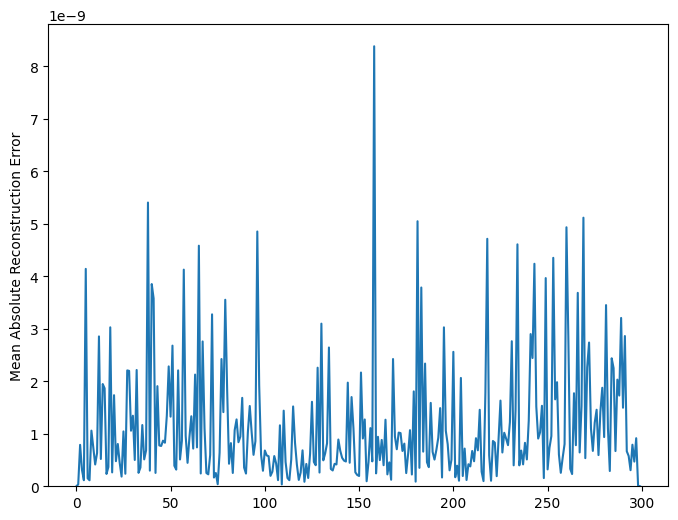

In [ ]:
vis.plot_sweep(model, norm=False, rec_error=True)

In [ ]:
!cd {config.base_dir} && ls

 initial_exploration  'initial_exploration\log.txt'


In [ ]:
figures_folder = os.path.join(config.base_dir, config.exp_name)
!cd {figures_folder} && ls

initial_exploration_elm_sweep_error_dist.npz  initial_exploration_SWE_sweep_error_dist.pdf
initial_exploration_elm_sweep_error_dist.pdf  initial_exploration_SWE_sweep.npz
initial_exploration_elm_sweep.npz	      initial_exploration_SWE_sweep.pdf
initial_exploration_elm_sweep.pdf	      initial_exploration_SWE_sweep_rec_error.npz
initial_exploration_SWE_sweep_error_dist.npz  initial_exploration_SWE_sweep_rec_error.pdf
